In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Subplots

<IPython.core.display.Javascript object>


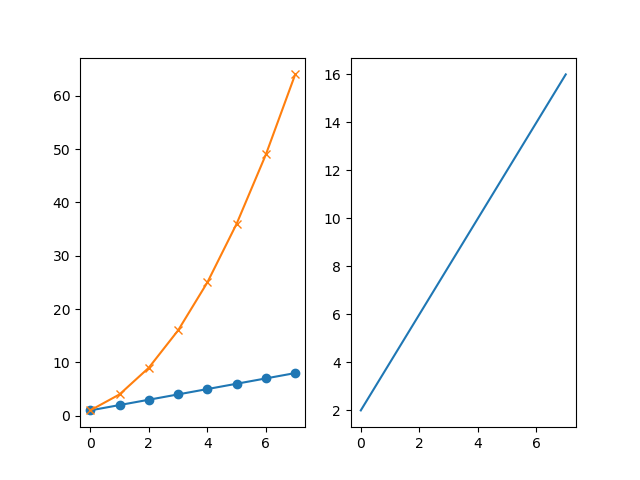

In [2]:
# 创建多个图表
plt.subplot(1, 2, 1)  # 1 行，2 列，在第 1 个图上绘制

linear_data = np.arange(1, 9)
plt.plot(linear_data, '-o')
plt.plot(linear_data**2, '-x')

In [3]:
plt.subplot(1, 2, 2)
plt.plot(linear_data*2, '-')

<IPython.core.display.Javascript object>


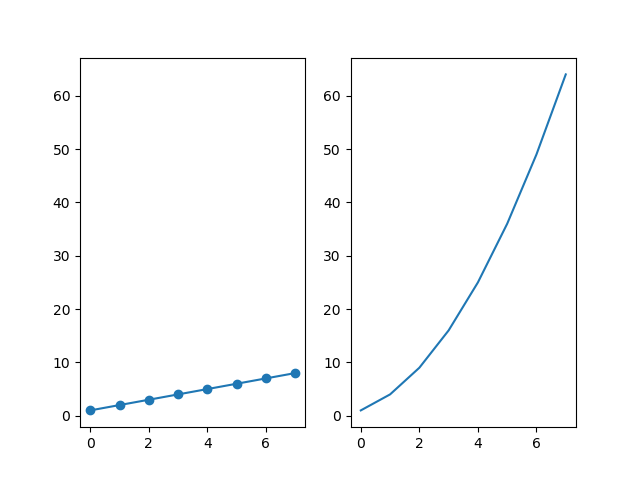

In [4]:
# 保证子图中坐标范围一致
plt.figure()  # figure() 新建立图表窗口

ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)  # 如果没有 sharey=ax1 则两个图表 y 轴刻度不一致
plt.plot(linear_data**2, '-')

<IPython.core.display.Javascript object>


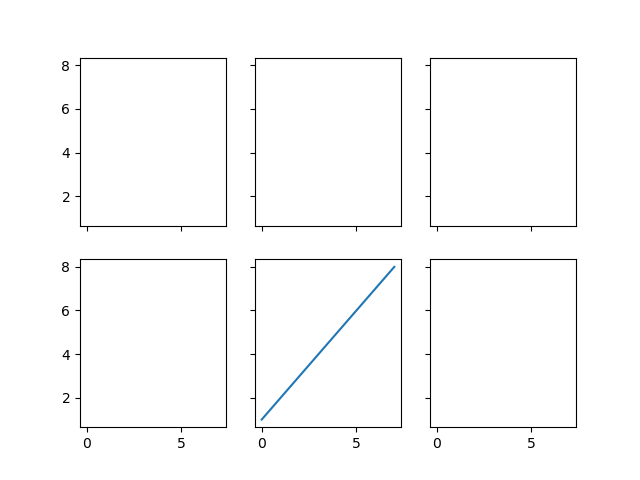

In [5]:
# plt.subplots() 并列图表
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True)
ax5.plot(linear_data, '-')

## 直方图

<IPython.core.display.Javascript object>


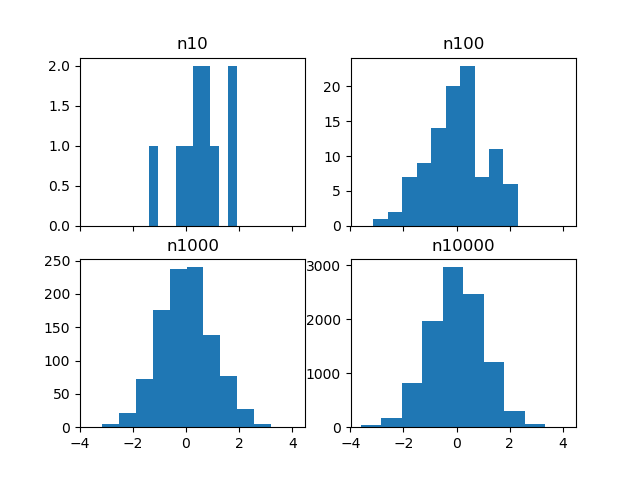

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)  # 正态分布的样本
    # 默认 bin 的个数为 10
    axs[n].hist(sample)
    axs[n].set_title('n{}'.format(sample_size))

<IPython.core.display.Javascript object>


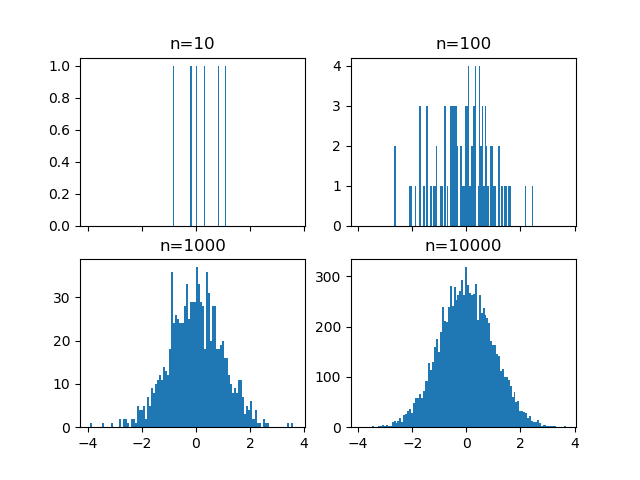

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)
    # bin设为100
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


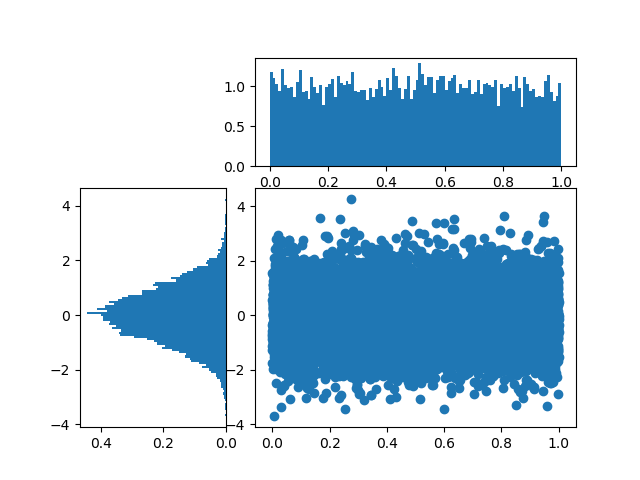

In [8]:
# 使用gridspec和直方图绘制一个复杂分析图
import matplotlib.gridspec as gridspec

x = np.random.random(size=10000)  # 随机分布样本
y = np.random.normal(loc=0., scale=1., size=10000)  # 正态分布样本

plt.figure()
gspec = gridspec.GridSpec(3, 3)  # 划分 3 行 3 列

top_hist = plt.subplot(gspec[0, 1:])  # 在 0 行 1、2 列绘制
side_hist = plt.subplot(gspec[1:, 0])  # 在 1、2 行 0 列绘制
lower_right = plt.subplot(gspec[1:, 1:])  # 在 1、2 行 1、2 列绘制

lower_right.scatter(x, y)  # 散点图
top_hist.hist(x, bins=100, normed=True)  # x 直方图
side_hist.hist(y, bins=100, orientation='horizontal', normed=True)  # y 直方图
side_hist.invert_xaxis()  # 设置方向

## 盒形图

In [9]:
# 正态分布采样
normal_sample = np.random.normal(loc=0., scale=1., size=10000)
# 随机数采样
random_sample = np.random.random(size=10000)
# gamma分布采样
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                  'random':random_sample, 
                  'gamma':gamma_sample})
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.994529,0.000374,0.500624
std,1.433733,1.004800,0.289216
min,0.019809,-3.696877,0.000167
25%,0.952001,-0.670082,0.249111
50%,1.668428,-0.012929,0.499965
75%,2.694421,0.679958,0.752079
max,14.531824,4.391679,0.999930


<IPython.core.display.Javascript object>


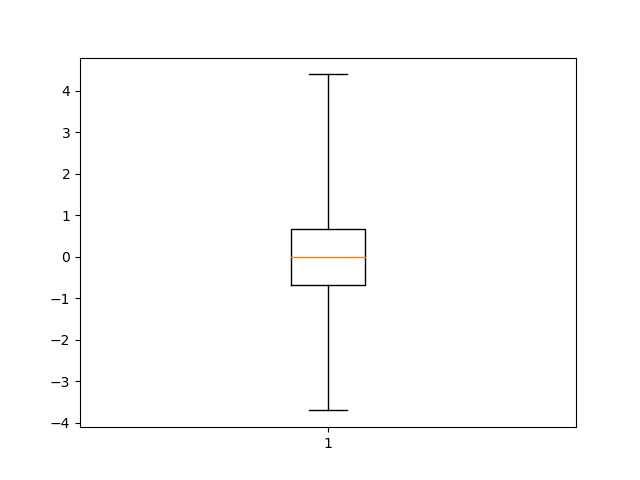

{'boxes': [<matplotlib.lines.Line2D at 0x26abdd7c780>],
 'caps': [<matplotlib.lines.Line2D at 0x26abdd831d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26abdd83e48>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26abdd83a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x26abdd7c8d0>,
  <matplotlib.lines.Line2D at 0x26abdd7cd68>]}

In [10]:
plt.figure()
plt.boxplot(df['normal'], whis='range')

<IPython.core.display.Javascript object>


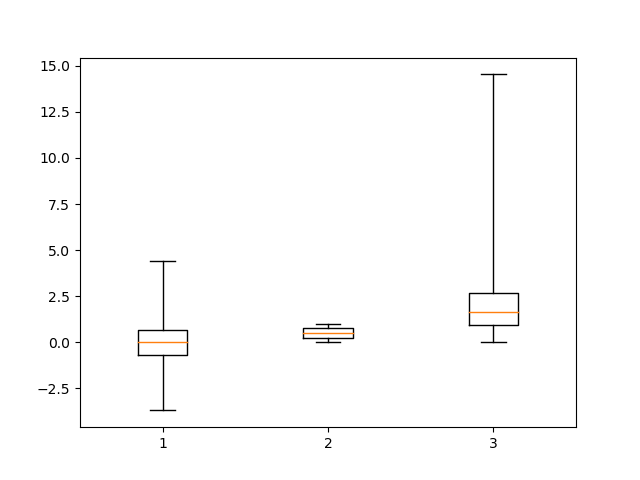

{'boxes': [<matplotlib.lines.Line2D at 0x26abe055668>,
 'caps': [<matplotlib.lines.Line2D at 0x26abe05c0b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x26abe05cd30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26abe05c908>,
 'whiskers': [<matplotlib.lines.Line2D at 0x26abe0557b8>,
  <matplotlib.lines.Line2D at 0x26abe08f780>]}

In [11]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')

<IPython.core.display.Javascript object>


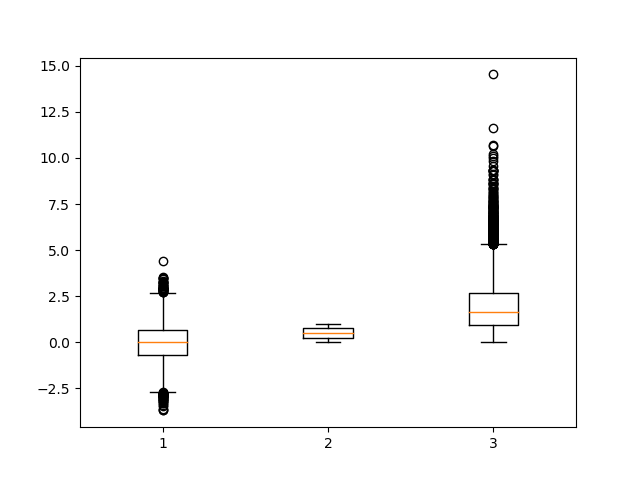

{'boxes': [<matplotlib.lines.Line2D at 0x26abe357f60>,
 'caps': [<matplotlib.lines.Line2D at 0x26abe35d9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26abe392668>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26abe392240>,
 'whiskers': [<matplotlib.lines.Line2D at 0x26abe35d0f0>,
  <matplotlib.lines.Line2D at 0x26abe3770b8>]}

In [12]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']])

## 热图

plt.hist2d()

plt.imshow()

plt.colorbar()：添加颜色条

<IPython.core.display.Javascript object>


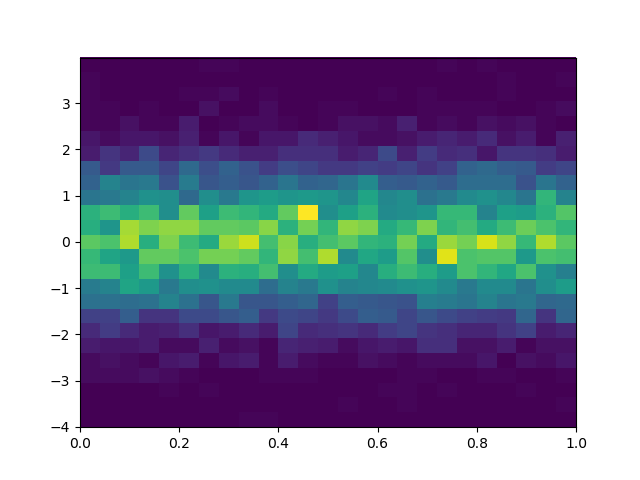

(array([[ 0.,  0.,  0.,  2.,  2.,  5.,  8., 13., 25., 28., 46., 45., 50.,
         42., 43., 26., 21., 19.,  5.,  4.,  1.,  1.,  1.,  1.,  0.],
        [ 0.,  0.,  0.,  2.,  3.,  4., 12., 13., 25., 30., 46., 39., 48.,
         35., 46., 27., 30., 11., 10.,  2.,  1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  2.,  4.,  8., 20., 24., 39., 38., 36., 59.,
         58., 42., 30., 26., 19.,  7.,  4.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  3.,  1.,  5.,  5., 10., 25., 36., 46., 51., 42.,
         54., 46., 34., 27., 19., 15.,  4.,  1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2.,  4.,  2.,  6., 10., 30., 27., 34., 51., 54.,
         56., 33., 33., 17., 14.,  7.,  3.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  5.,  2.,  9., 15., 25., 33., 43., 48., 46.,
         56., 51., 23., 28., 23.,  9.,  6.,  5.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  1.,  6.,  4., 15., 18., 34., 32., 53., 41.,
         51., 38., 33., 18., 16., 11.,  1.,  0.,  3.,  1.,  0.

In [13]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=25)

<IPython.core.display.Javascript object>


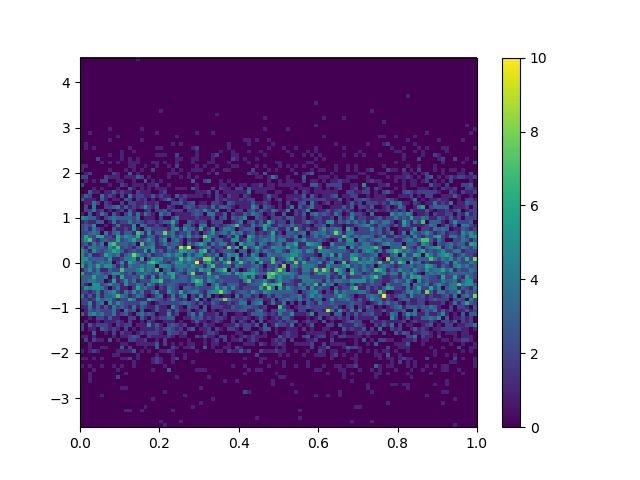

In [15]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=100)

# 添加颜色条
plt.colorbar()

<IPython.core.display.Javascript object>


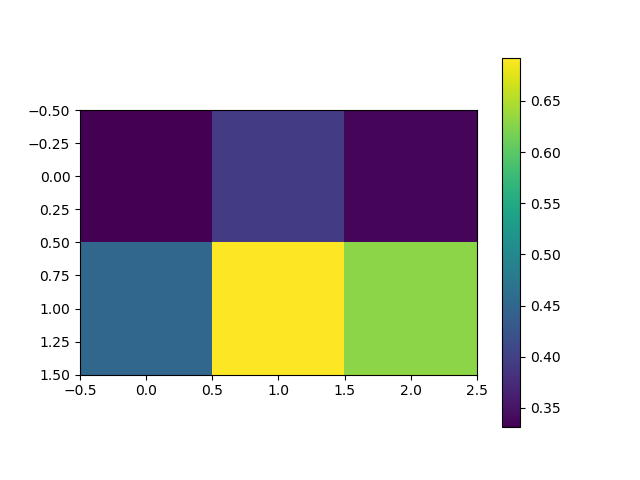

In [23]:
plt.figure()
plt.imshow(np.random.rand(2, 3))
plt.colorbar()